In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge,Lasso,RidgeCV,ElasticNet,ElasticNetCV,LassoCV,LinearRegression
import seaborn as sns


C:\Users\ajitg\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ajitg\miniconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ajitg\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Reading CSV file

In [2]:
df = pd.read_csv('final.csv')

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.head(10)

,ChannelBandwidth,Freq,RSSI,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets,Score
0,0,2447,-50,9.722222,3,3.082237,182686,270,66588,263,42.33
1,0,2412,-95,0.000000,0,556.061333,521148474,528509,58537457,257923,39.96
2,1,2472,-59,6.944444,0,8.599071,521148474,528509,58537555,257924,42.12
3,0,2437,-49,9.722222,0,2.758319,521148474,528509,58537845,257927,48.36
4,0,2412,-95,0.000000,0,556.061333,521370780,528877,58606944,258277,39.96
5,0,2437,-49,9.722222,0,2.758319,521429332,528969,58626232,258356,48.36
6,0,2437,-45,9.722222,0,1.740382,521450081,529022,58639076,258397,52.58
7,0,2437,-81,2.777778,0,109.810652,197077350,304999,44693477,198081,32.05
8,0,2412,-90,1.388889,0,312.696267,523316916,534892,68809875,268426,35.00
9,0,2412,-88,1.388889,0,248.383474,523316916,534892,68809875,268426,34.15


In [5]:
df.shape

(2141, 11)

# Model training

In [6]:
#label
data_y = np.array(df['Score'])
df= df.drop('Score', axis = 1)
#features
feature_list = list(df.columns)
data_x = np.array(df)

In [7]:
data_x.shape

(2141, 10)

In [8]:
x = df[['ChannelBandwidth','Freq','RSSI','channel_utilisation','count','distance','rxbytes','rxpackets','txbytes','txpackets']]
x.columns

Index(['ChannelBandwidth', 'Freq', 'RSSI', 'channel_utilisation', 'count',
       'distance', 'rxbytes', 'rxpackets', 'txbytes', 'txpackets'],
      dtype='object')

In [9]:
data_x

array([[ 0.00000000e+00,  2.44700000e+03, -5.00000000e+01, ...,
         2.70000000e+02,  6.65880000e+04,  2.63000000e+02],
       [ 0.00000000e+00,  2.41200000e+03, -9.50000000e+01, ...,
         5.28509000e+05,  5.85374570e+07,  2.57923000e+05],
       [ 1.00000000e+00,  2.47200000e+03, -5.90000000e+01, ...,
         5.28509000e+05,  5.85375550e+07,  2.57924000e+05],
       ...,
       [ 0.00000000e+00,  2.42200000e+03, -6.50000000e+01, ...,
         1.25915500e+06,  1.62088516e+08,  6.31730000e+05],
       [ 2.00000000e+00,  5.22000000e+03, -6.80000000e+01, ...,
         1.25915500e+06,  1.62088516e+08,  6.31730000e+05],
       [ 0.00000000e+00,  2.43700000e+03, -5.10000000e+01, ...,
         8.30000000e+01,  4.29040000e+04,  6.90000000e+01]])

In [10]:
data_y

array([42.33, 39.96, 42.12, ..., 37.69,  8.76, 43.04])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)


# LinearRegression

In [12]:

l_reg = linear_model.LinearRegression()

model = l_reg.fit(x_train,y_train)
predictions = model.predict(x_test)

print("R^2 value: ", l_reg.score(data_x,data_y))
print("coedd: ",l_reg.coef_)
print("intercept: ",l_reg.intercept_)

R^2 value:  0.9947654807013059
coedd:  [ 7.97299366e-01  2.46756702e-03  7.51611862e-01 -7.08927427e-01
  4.10975463e-01  4.06322149e-02  3.89237766e-09 -4.93350355e-06
  1.87007278e-08 -2.29922351e-07]
intercept:  83.8060521046769


In [13]:
# Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

y_pred = predictions
y_true = y_test
print('Accuracy: ',r2_score(y_true,y_pred))


Accuracy:  0.9948312377872031


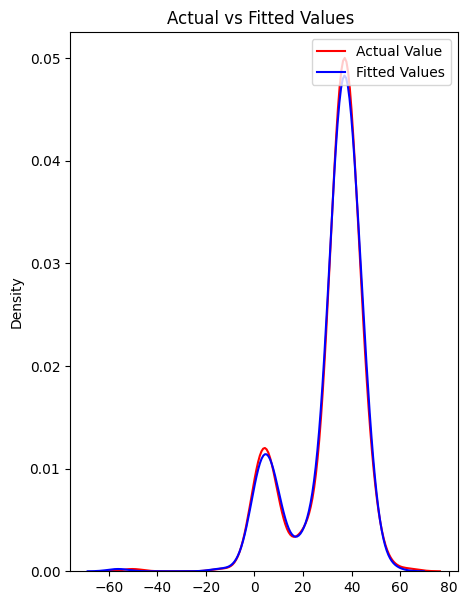

In [14]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.kdeplot(y_true, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values ')
# Add a legend
plt.legend(loc='upper right')


plt.show()
plt.close()

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)             

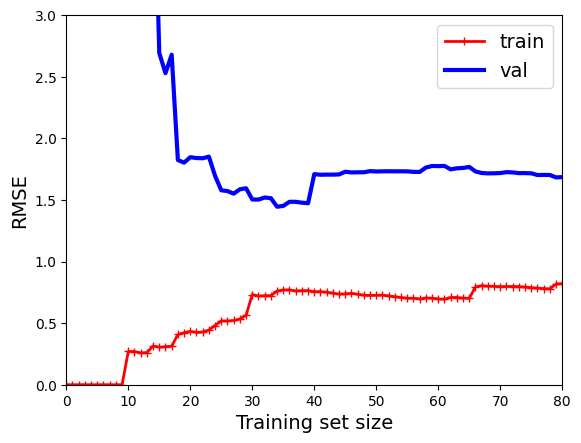

In [16]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x_train, y_train)
plt.axis([0, 80, 0, 3])                        
plt.show()                                     

There is a gap between the curves. This means that the model performs
significantly better on the training data than on the validation data,
which is the hallmark of an overfitting model. If you used a much larger
training set, however, the two curves would continue to get closer.

# Save the Model

In [17]:
import pickle
filename = 'LinearRegression.pkl'
with open(filename, 'wb') as file:
    pickle.dump(l_reg, file)

In [24]:
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)
result = loaded_model.predict([[1,5745,-62,10,1,50,2238650202,1873649,155886468,783116]])

print(result)

[49.73805304]


# Lasso Reg 

In [25]:
# Create Lasso and Ridge regression models
lasso =Lasso(alpha=0.1)

# Fit the models on the training data
lasso.fit(x_train, y_train)

# Make predictions on the testing data
lasso_pred = lasso.predict(x_test)

# Evaluate the performance of the models using mean squared error
lasso_mse = mean_squared_error(y_test, lasso_pred)

print("Lasso MSE: ", lasso_mse)



Lasso MSE:  1.3145476745702132


C:\Users\ajitg\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.262e+03, tolerance: 3.414e+01
  model = cd_fast.enet_coordinate_descent(


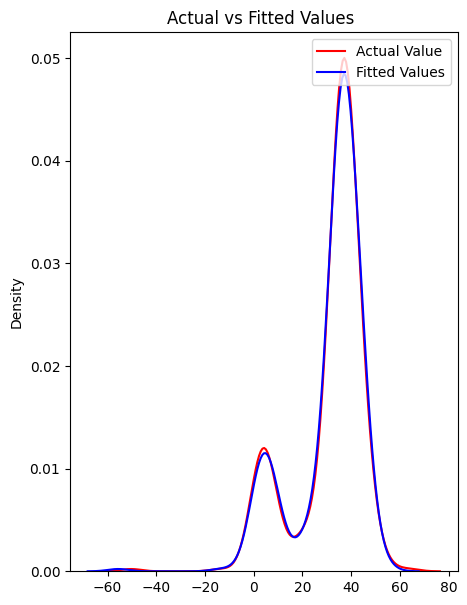

In [26]:
plt.figure(figsize=(5, 7))


ax = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(lasso_pred, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values ')
# Add a legend
plt.legend(loc='upper right')


plt.show()
plt.close()

In [33]:
lasso_pred.shape

(429,)

In [34]:
y_test.shape

(429,)

In [35]:
r2_score(lasso_pred,y_test)

0.9933416868910989

In [37]:
# Calculate the absolute errors
errors = abs(lasso_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.72 degrees.
Accuracy: 96.48 %.


C:\Users\ajitg\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


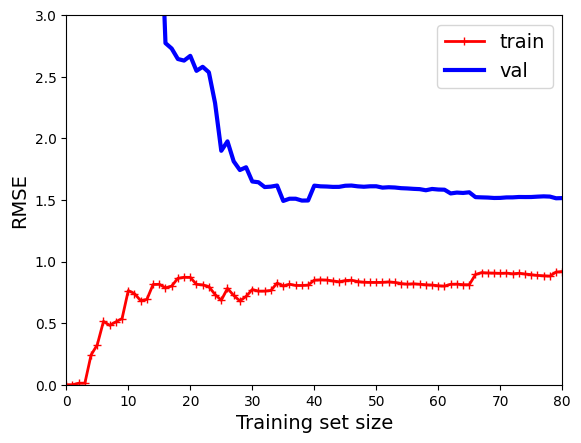

In [28]:
lasso_reg = Lasso(alpha=0.1, tol=1e-2)

plot_learning_curves(lasso_reg, x_train, y_train)
plt.axis([0, 80, 0, 3])                        
plt.show() 

# Save the Model


In [29]:
import pickle
filename = 'LinearRegressorLasso.pkl'
with open(filename, 'wb') as file:
    pickle.dump(lasso, file)
print("Model dumped!")

Model dumped!


In [36]:
# with open(filename, 'rb') as file:
#     loaded_model = pickle.load(file)
# result = loaded_model.predict([[-74,5745,2,2238650202,1873649,155886468,783116,3.0,20.807024]])

# print(result)